# LangChain and CSV Practice

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

Python-dotenv could not parse statement starting at line 8


True

In [2]:
openai_key = os.environ.get("OPENAI_API_KEY")
temperature = 0
model = "gpt-3.5-turbo"

## Data

In [9]:
input_file = "../data/sales.csv"

sales_df = pd.read_csv(input_file, encoding='utf-8')

sales_df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [10]:
len(sales_df)

7991

In [11]:
movie_df = pd.read_csv("../data/movies.csv", encoding='utf-8')

movie_df.head()

,movie,year,category,duration,genres,rating,tagline,director,stars,votes
0,Range 15,2016,TV-MA,89,"Action, Comedy, Horror",4.3,Veterans wake up after a night of partying to ...,Ross Patterson,"Sean Astin, Keith David, Danny Trejo, William ...",5010
1,Snake in the Eagle's Shadow,1978,PG,90,"Action, Comedy",7.3,An orphan who has been raised at a kung fu sch...,Woo-Ping Yuen,"Jackie Chan, Siu-Tin Yuen, Jeong-lee Hwang, De...",12191
2,Twinkle Twinkle Lucky Stars,1985,TV-14,105,"Action, Comedy",6.2,5 HK cops (4 horny males) on vacation in Patta...,Sammo Kam-Bo Hung,"Sammo Kam-Bo Hung, Richard Ng, Eric Tsang, Kiu...",4164
3,McHale's Navy,1997,PG,108,"Action, Comedy",4.5,"A retired Navy officer returns to active duty,...",Bryan Spicer,"Tom Arnold, Dean Stockwell, Ernest Borgnine, D...",6891
4,Fastlane,2002,TV-14,60,"Action, Comedy, Crime",7.4,Two hotshot undercover cops and their equally ...,NaN,"Peter Facinelli, Bill Bellamy, Tiffani Thiesse...",3600


In [12]:
len(movie_df)

23096

## Using Create_CSV_Agent

*[Source](https://python.langchain.com/docs/integrations/toolkits/csv)*


This agent calls the PandasDataFrame agent then calls the Python agent which then executes LLM generated Python code.

In [3]:
from langchain.agents import create_csv_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType

### One CSV - movies.csv

In [4]:
agent = create_csv_agent(
    OpenAI(temperature = temperature),
    "../data/movies.csv",
    verbose = True,
    agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

In [32]:
# 1

agent.run("How many movies are in the action genre?")



> Entering new AgentExecutor chain...


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ServiceUnavailableError: The server is overloaded or not ready yet..


Thought: I need to count the number of movies that have "Action" in the "genres" column.
Action: Use the `str.contains()` method to check if "Action" is in the "genres" column, and then use the `sum()` function to count the number of True values.
Action Input: `df['genres'].str.contains('Action').sum()`
Observation: Use the `str.contains()` method to check if "Action" is in the "genres" column, and then use the `sum()` function to count the number of True values. is not a valid tool, try one of [python_repl_ast].
Thought:I need to use the `python_repl_ast` tool to execute the command.
Action: python_repl_ast
Action Input: `df['genres'].str.contains('Action').sum()`
Observation: 6486
Thought:The number of movies in the action genre is 6486.
Final Answer: 6486

> Finished chain.


'6486'

In [5]:
# 2

agent.run("What movie title in the comedy genre has the highest rating?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include comedy movies and then find the highest rating.
Action: python_repl_ast
Action Input: df[df['genres'].str.contains('Comedy')]['movie'][df[df['genres'].str.contains('Comedy')]['rating'].idxmax()]
Observation: The Last Drive-In with Joe Bob Briggs
Thought: I now know the final answer
Final Answer: The Last Drive-In with Joe Bob Briggs

> Finished chain.


'The Last Drive-In with Joe Bob Briggs'

In [6]:
# 3

agent.run("Which movie has the most number of votes and who is the director of that movie?")



> Entering new AgentExecutor chain...
Thought: I need to find the movie with the highest number of votes
Action: python_repl_ast
Action Input: df[df['votes'] == df['votes'].max()]['director']
Observation: 7067    Frank Darabont
Name: director, dtype: object
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: The movie with the most number of votes is The Shawshank Redemption, directed by Frank Darabont.

> Finished chain.


'The movie with the most number of votes is The Shawshank Redemption, directed by Frank Darabont.'

### One CSV - sales.csv

In [20]:
agent = create_csv_agent(
    OpenAI(temperature = temperature, model = model),
    "../data/sales.csv",
    verbose = True,
    agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

In [ ]:
# 1 

agent.run("What is the total number of the order quantities?")



> Entering new AgentExecutor chain...
Thought: I need to sum up all the order quantities
Action: python_repl_ast
Action Input: df['Order Quantity'].sum()
Observation: 36162
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: The total number of the order quantities is 36162.

> Finished chain.


'The total number of the order quantities is 36162.'

In [ ]:
# 2

agent.run("How many order quantities does the product with a warehouse code of WARE-NMK1003 have?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows with a warehouse code of WARE-NMK1003
Action: python_repl_ast
Action Input: df[df['WarehouseCode'] == 'WARE-NMK1003']['Order Quantity'].sum()
Observation: 11351
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: 11351

> Finished chain.


'11351'

In [ ]:
# 3

agent.run("Which customer had made the most purchase online")



> Entering new AgentExecutor chain...
Thought: I need to find out which customer has made the most purchases online
Action: python_repl_ast
Action Input: df[df['Sales Channel'] == 'Online'].groupby('_CustomerID').sum()['Order Quantity'].sort_values(ascending=False).head(1)
Observation: _CustomerID
21    292
Name: Order Quantity, dtype: int64
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: Customer ID 21 has made the most purchases online.

> Finished chain.


'Customer ID 21 has made the most purchases online.'

### Multiple CSVs

In [8]:
agent = create_csv_agent(
    OpenAI(temperature = temperature, model = model),
    ["../data/movies.csv", "../data/sales.csv"],
    verbose = True,
    agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

In [9]:
# Testing if it read both of the csv files correctly

agent.run("What are the headers for both of the csv files?")



> Entering new AgentExecutor chain...
Thought: I can use the `columns` attribute of the dataframes to get the headers.
Action: python_repl_ast
Action Input: df1.columns
Observation: Index(['movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline',
       'director', 'stars', 'votes'],
      dtype='object')
Thought:The headers for df1 are 'movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline', 'director', 'stars', and 'votes'. Now I need to find the headers for df2.
Action: python_repl_ast
Action Input: df2.columns
Observation: Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')
Thought:The headers for df2 are 'OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate', 'Cu

"The headers for df1 are 'movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline', 'director', 'stars', and 'votes'. The headers for df2 are 'OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied', 'Unit Cost', and 'Unit Price'."

In [10]:
# Trying to test if it can determine which csv file to search in based on a query (movies.csv)

agent.run("What movie title in the comedy genre has the highest rating?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include movies in the comedy genre, and then find the movie with the highest rating.
Action: Use pandas to filter the dataframe and find the movie with the highest rating.
Action Input: 
```python_repl_ast
comedy_movies = df1[df1['genres'].str.contains('Comedy')]
highest_rating = comedy_movies['rating'].max()
highest_rating_movie = comedy_movies[comedy_movies['rating'] == highest_rating]['movie']
highest_rating_movie
```
Observation: Use pandas to filter the dataframe and find the movie with the highest rating. is not a valid tool, try one of [python_repl_ast].
Thought:I need to use the `python_repl_ast` tool to execute the code.
Action: Use the `python_repl_ast` tool to execute the code.
Action Input: 
```python_repl_ast
comedy_movies = df1[df1['genres'].str.contains('Comedy')]
highest_rating = comedy_movies['rating'].max()
highest_rating_movie = comedy_movies[comedy_movies['rating'] == highest_rat

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-gpt-3.5-turbo in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


I need to use the `python_repl_ast` tool to execute the code.
Action: Use the `python_repl_ast` tool to execute the code.
Action Input: 
```python_repl_ast
comedy_movies = df1[df1['genres'].str.contains('Comedy')]
highest_rating = comedy_movies['rating'].max()
highest_rating_movie = comedy_movies[comedy_movies['rating'] == highest_rating]['movie']
highest_rating_movie
```
Observation: Use the `python_repl_ast` tool to execute the code. is not a valid tool, try one of [python_repl_ast].
Thought:

KeyboardInterrupt: 

In [13]:
# Trying to test if it can determine which csv file to search in based on a query (sales.csv)

agent.run("How many order quantities does the product with a warehouse code of WARE-NMK1003 have?")



> Entering new AgentExecutor chain...


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-gpt-3.5-turbo in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


Thought: I need to filter the dataframe df2 to only include rows where the WarehouseCode is "WARE-NMK1003", and then count the number of order quantities for that product.
Action: python_repl_ast
Action Input: df2[df2['WarehouseCode'] == 'WARE-NMK1003']['Order Quantity'].count()
Observation: 2505
Thought:

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-gpt-3.5-turbo in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-gpt-3.5-turbo in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit ht

There are 2505 order quantities for the product with a warehouse code of WARE-NMK1003.
Final Answer: 2505

> Finished chain.


'2505'

## Using Pandas DataFrame Agent

In [9]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType

In [10]:
from langchain.llms import OpenAI
import pandas as pd

sales_df = pd.read_csv("../data/sales.csv")

In [16]:
llm = OpenAI(temperature = temperature)

### One DataFrame

In [17]:
agent = create_pandas_dataframe_agent(llm, sales_df, verbose = True)

In [18]:
agent.run("Calculate the total sales revenue for all orders.")



> Entering new AgentExecutor chain...


Thought: I need to calculate the total sales revenue for all orders.
Action: python_repl_ast
Action Input: df['Unit Price'] * df['Order Quantity']
Observation: 0                1,963.101,963.101,963.101,963.101,963.10
1                                3,939.603,939.603,939.60
2                                                1,775.50
3       2,324.902,324.902,324.902,324.902,324.902,324....
4       1,822.401,822.401,822.401,822.401,822.401,822....
                              ...                        
7986                                                234.5
7987     3,202.603,202.603,202.603,202.603,202.603,202.60
7988             3,825.703,825.703,825.703,825.703,825.70
7989    1,072.001,072.001,072.001,072.001,072.001,072....
7990             2,211.002,211.002,211.002,211.002,211.00
Length: 7991, dtype: object
Thought: I need to sum the values in the output.
Action: python_repl_ast
Action Input: df['Unit Price'] * df['Order Quantity'].sum()
Observation: 0       1,963.101,963.101,96

'The total sales revenue for all orders is $25,945,945.'

In [19]:
agent.run("Find the top 5 products by the quantity sold.")



> Entering new AgentExecutor chain...
Thought: I need to find the total quantity sold for each product and then sort them in descending order.
Action: python_repl_ast
Action Input: df.groupby('_ProductID')['Order Quantity'].sum().sort_values(ascending=False).head()
Observation: _ProductID
23    956
37    896
8     879
4     878
40    855
Name: Order Quantity, dtype: int64
Thought: I now know the top 5 products by the quantity sold.
Final Answer: The top 5 products by the quantity sold are 23, 37, 8, 4, and 40.

> Finished chain.


'The top 5 products by the quantity sold are 23, 37, 8, 4, and 40.'

In [23]:
agent.run("Calculate the average discount applied to orders for each sales channel and currency code combination.")



> Entering new AgentExecutor chain...
Thought: I need to group the data by sales channel and currency code, then calculate the average discount applied.
Action: python_repl_ast
Action Input: df.groupby(['Sales Channel', 'CurrencyCode'])['Discount Applied'].mean()
Observation: Sales Channel  CurrencyCode
Distributor    USD             0.112909
In-Store       USD             0.113834
Online         USD             0.116443
Wholesale      USD             0.113186
Name: Discount Applied, dtype: float64
Thought: I now know the final answer
Final Answer: The average discount applied to orders for each sales channel and currency code combination is 0.112909 for Distributor, 0.113834 for In-Store, 0.116443 for Online, and 0.113186 for Wholesale.

> Finished chain.


'The average discount applied to orders for each sales channel and currency code combination is 0.112909 for Distributor, 0.113834 for In-Store, 0.116443 for Online, and 0.113186 for Wholesale.'



> Entering new AgentExecutor chain...
Thought: I need to find the top 5 products by quantity
Action: python_repl_ast
Action Input: df.groupby('_ProductID')['Order Quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar chart showing the top 5 products sold by quantity.

> Finished chain.


'A bar chart showing the top 5 products sold by quantity.'

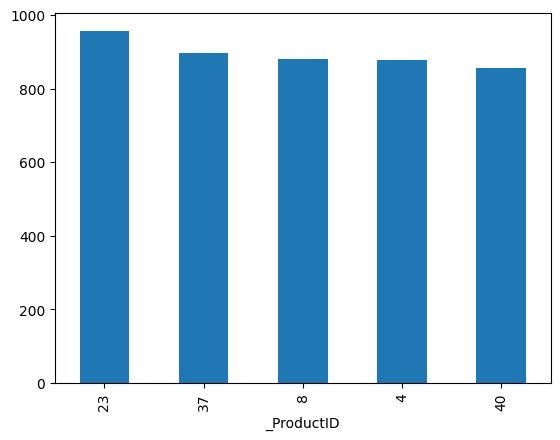

In [26]:
agent.run("Plot the top 5 products sold by quantity")

### Two DataFrames

In [35]:
small_movies = pd.read_csv("../data/movies.csv", nrows = 1000)
small_sales =  pd.read_csv("../data/sales.csv", nrows = 1000)

In [37]:
agent = create_pandas_dataframe_agent(llm, [small_movies, small_sales], verbose = True)

In [38]:
agent.run("What are the headers for both of the csv files?")



> Entering new AgentExecutor chain...
Thought: I need to find the headers for both dataframes
Action: python_repl_ast
Action Input: print(df1.columns)
Observation: Index(['movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline',
       'director', 'stars', 'votes'],
      dtype='object')

Thought: I need to find the headers for the second dataframe
Action: python_repl_ast
Action Input: print(df2.columns)
Observation: Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')

Thought: I now know the final answer
Final Answer: The headers for df1 are 'movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline', 'director', 'stars', 'votes'. The headers for df2 are 'OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate', '

"The headers for df1 are 'movie', 'year', 'category', 'duration', 'genres', 'rating', 'tagline', 'director', 'stars', 'votes'. The headers for df2 are 'OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price'."

In [39]:
agent.run("Calculate the average discount applied to orders for each sales channel and currency code combination.")



> Entering new AgentExecutor chain...
Thought: I need to group the data by sales channel and currency code and then calculate the average discount applied.
Action: python_repl_ast
Action Input: df.groupby(['Sales Channel', 'CurrencyCode'])['Discount Applied'].mean()
Observation: NameError: name 'df' is not defined
Thought: I need to define the dataframe first.
Action: python_repl_ast
Action Input: df = pd.concat([df1, df2])
Observation: NameError: name 'pd' is not defined
Thought: I need to import pandas first.
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 Now I can define the dataframe.
Action: python_repl_ast
Action Input: df = pd.concat([df1, df2])
Observation: 
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 Now I can calculate the average discount applied.
Action: python_repl_ast
Action Input: df.groupby(['Sales Channel', 'CurrencyCode'])['Discount Applied'].mean()
Observation: Sales Channel  CurrencyCode
Distributor    USD             0.119016
In-Store       USD             0.111247
Online         USD             0.119613
Wholesale      USD             0.108962
Name: Discount Applied, dtype: float64
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-8s0GpBTuKfLf5Ae3c3Bdn0jI on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer.
Final Answer: The average discount applied to orders for each sales channel and currency code combination is 0.119016 for Distributor and USD, 0.111247 for In-Store and USD, 0.119613 for Online and USD, and 0.108962 for Wholesale and USD.

> Finished chain.


'The average discount applied to orders for each sales channel and currency code combination is 0.119016 for Distributor and USD, 0.111247 for In-Store and USD, 0.119613 for Online and USD, and 0.108962 for Wholesale and USD.'